# Python Lab 1: Read, Write, Vizualize!

## Agenda

1. Why Python?
2. Objectives
3. Setting up your development environment
4. Reading and writing tabular data with the Numpy library
5. Encapsulating data with the Pandas library
6. Plotting with the Matplotlib library
7. Working with NetCDF and HDF

## Why Python?

Pros
* General-purpose, cross-platform
* Free and open source
* Resaonably easy to learn, good statistical/visualization libraries
* Forces good syntax
* Reads satellite data formats like HDF, NetCDF, GRIB

Cons
* Performance penalties for interpretted languages (although cython and f2py libriries can be used)
* Libraries are a "black box" and can be discontinued

Other options:
* R: Specialized for statistics but prevalent in earth sciences. Python has borrowed some of the best R features (e.g. data frames).
* Fortran/C++: Most common in algorithm development, lots of legacy code. Speed +100, coding productivity -100 
* Matlab: License expensive (Octave is a reasonable alternative)
* IDL: Licenses expensive, there are better options out there

## Objective: working with satellite datasets

* You won't learn how to code in Python
	* Some (free!) ways to learn: [automate boring stuff](Automate the Boring Stuff with Python), [codeacademy](https://www.codecademy.com/learn/learn-python), [find Meetups](https://www.meetup.com/find/tech/) or start your own!
* You will learn to:
	* Read/write satellite datasets
	* Plot datasets
	* Perform re-gridding, merging, averaging, filtering

## Development environments: How do I Python?
* Spyder: most Matlab-like
* Text editor + command line
* Jupyter notebooks: web based, can launch in browser

## Launching Jupyter Notebook
You need *Anaconda Python* installed! You can also [install with pip](http://jupyter.org/install.html), but you're on your own.

### Macs/Unix:
* Open terminal, and type:
```
cd to/the/directory/
jupyter notebook    
```

### Windows:
* Open Anaconda Prompt
```
cd to\the\directory\
jupyter notebook    
```

### NOAA/STAR Laptops
* Drag/drop "Jupyter Notebooks" icon from the start menu to the folder where you have your Desktop.
* Double click

## Launching Jupyter Notebook

This will launch your default web browser with a local webserver that displays the contents of the directory that you're working in. 

Click on New on the top right:
![](img/ipython-notebook.PNG)

You can edit and run code directly in this notebook (similar to Mathematica):

In [ ]:
# This is a comment
print("hello world")

# This is math
2+2

# This is an array
test=[1, 2, 3, 4]

# This will show me the array
print(test)

# This is a function (note the TAB!)
def Farenheit2Celsius(F):
    return (F-32)*5/9

# This calls the function
Farenheit2Celsius(32)

## Importing libraries
Packages/libraries give us additional functionality, saving us the trouble of writing procedures ourselves. One of the most popular in scientific computing is [numpy](http://www.numpy.org/)

In [4]:
import numpy as np

## Numpy

The "as np" part is optional, but is a good practice so you know where the functions come from.

## Defining Arrays
```python
a = np.arange(15).reshape(3, 5)
a.shape
a.size
```
Note: if you do not assign the operation to a variable, then it will print to the screen and NOT be stored.

## Array operations
```python
b = np.arange(12).reshape(3,4)
b
# Sum along rows
b.sum(axis=0)
# Get the minimum value along columns
b.min(axis=1)
# Boolean operations
b>1
```
For more examples, work through the: [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

# Pandas
* A library that helps encapsulate data
* Comparable to data frames in R, structures in IDL, namespaces in C++ and modern Fortran

Pros:
* You can name columns and refence by labels instead of indices like in numpy arrays
* This also makes performing group operations easier and more readable

Cons:
* Pandas is a wrapper for Numpy, so there is some efficiency overhead
* Numpy arrays are better for referncing datasets > 2D

In [5]:
import pandas as pd

url = 'https://aeronet.gsfc.nasa.gov/aeronet_locations_v3.txt'
stationList = pd.read_csv(url, skiprows=1)

In [3]:
# Show column names - kind of ugly
list(stationList)

['Site_Name',
 'Longitude(decimal_degrees)',
 'Latitude(decimal_degrees)',
 'Elevation(meters)']

In [6]:
# Make easier to write
stationList.columns = ['site', 'lon', 'lat', 'elev']
stationList

,site,lon,lat,elev
0,Cuiaba,-56.070214,-15.555244,234.00
1,Alta_Floresta,-56.104453,-9.871339,277.00
2,Jamari,-63.068552,-9.199070,129.00
3,Tucson,-110.953003,32.233002,779.00
4,GSFC,-76.839833,38.992500,87.00
5,Kolfield,-74.476387,39.802223,50.00
6,Porto_Nacional,-48.410000,-10.700000,210.00
7,Brasilia,-47.900002,-15.917000,1100.00
8,Harvard_Forest,-72.188000,42.532000,339.00
9,Wallops,-75.471950,37.932850,37.00


# Exercise: Import ascii file
From the data folder, import "20180801_20180831_PNNL_lev15.csv." What are the column names?

## Basic Plotting

Common (simple) tasks in remote sensing...
* Histograms
* Time series
* Averaging, computing bias

Matplotlib is a useful library.



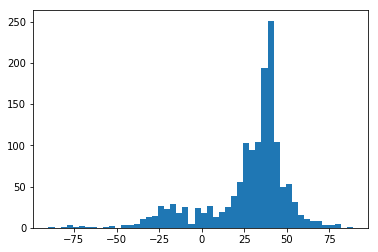

In [17]:
# Matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create a histogram with 50 bins
plt.hist(stationList["lat"], bins=50)
plt.show()

### Time series data

Need to tell python the date strings in the file are dates/times.

In [ ]:
### Some aethetics

# Exercise: Make a time series plot 
Use the data in "20180801_20180831_PNNL_lev15.csv"

## netCDF4
There's a built in netCDF4 and HDF library.


In [18]:
from netCDF4 import Dataset

# To open the files, use the Dataset command
file_id = Dataset('data/JRR-AOD_v1r1_npp_s201808091955538_e201808091957180_c201808092049460.nc')

# Then to inspect the contents, run the following:


In [19]:
# Copy the variable into an array object using .variables

AOD550 = file_id.variables['AOD550'][:]
lat = file_id.variables['Latitude'][:]
lon = file_id.variables['Longitude'][:]

# Exercise: Import netCDF file and perform basic analsys
From the data folder, import "JRR-AOD_v1r1_npp_s201808091958446_e201808092000088_c201808092051450.nc"

## Closing up
We'll be around for the next 30 minutes and I am available by email: rebekah.esmaili@gmail.com

When we started, we stated that our goals were to: 

Objective: working with satellite datasets
* You won't learn how to code in Python
	* Some (free!) ways to learn: [automate boring stuff](Automate the Boring Stuff with Python), [codeacademy](https://www.codecademy.com/learn/learn-python), [find Meetups](https://www.meetup.com/find/tech/) or start your own!
* You will learn to:
	* Read/write satellite datasets
	* Plot datasets
	* Perform re-gridding, merging, averaging, filtering

How did we deliver? Please fill out survey!

Next session: Friday, Nov 9th 9:30-11:30am

## Thank you!
I hope you enjoyed this crash course in python in remote sensing applications! Please fill out feedback, write as much as you can!